# Mapper for 3D Volumetric Images

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from run_mapper import mapper
from mapper_viz import plot_mapper, plot_colorbar, draw_slices
import matplotlib

## Mapper on a 2D Image

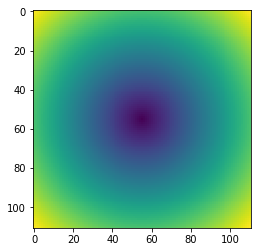

In [2]:
# Generate 2D test data set
n = 111
X = np.array([[i - n//2  for i in range(n)] for i in range(n)])
Y = X.T

R = np.sqrt(np.power(X,2) + np.power(Y,2))

plt.imshow(R,cmap='viridis')
plt.show()


In [3]:
# Run mapper
mapper(R, "./out/2Dtrial", 
       num_intervals=5, 
       overlap=4, 
       interval_scheme="fixed", 
       verbose=True, 
       cluster_threshold=-1,
       save_labels=True)

Binning data...
Creating directory...
Labeling data...
time: 0.0
Clustering data...
time: 0.0
Clusters found: 8
Finding edges...
Creating graph...
Writing data...
total time: 0.02


0

In [4]:
# Load label arrays
L0 = np.load("./out/2Dtrial/labels0.npy")
L1 = np.load("./out/2Dtrial/labels1.npy")
O = np.logical_and(L0,L1)

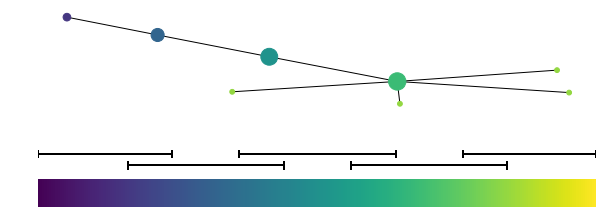

In [5]:
# Generate plot
fig, ax = plt.subplots(2, 1,figsize=(10,4))

# Plot mapper
(vmin, vmax, intervals) = plot_mapper(ax[0], plot_layout='spring', out_location="./out/2Dtrial", cmap='viridis',spring_k=None,big_component=False)

# Plot colorbar
plot_colorbar(ax[1], 1.5 + 0, 1.5 + 0.4, intervals, vmin, vmax, 'viridis','horizontal')

# Save/show
#plt.savefig("./out/mapper.png",dpi=300, bbox_inches = 'tight',pad_inches = 0)
plt.show()



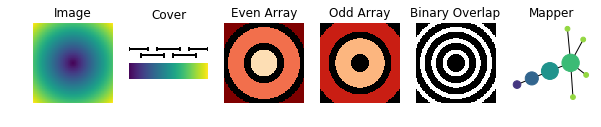

In [6]:
# Generate plot
fig, ax = plt.subplots(1, 6,figsize=(10,2))

# Plot images
ax[0].imshow(R,cmap="viridis")
cmap = plt.cm.OrRd#matplotlib.cm.get_cmap('viridis')
cmap.set_under(color='black') 
ax[2].imshow(L0,cmap=cmap,vmin=0.1,vmax=5)
ax[3].imshow(L1,cmap=cmap,vmin=0.1,vmax=5)
ax[4].imshow(O,cmap="gray")

# Set titles
ax[0].set_title("Image")
ax[1].set_title("Cover",y=1.65)
ax[2].set_title("Even Array")
ax[3].set_title("Odd Array")
ax[4].set_title("Binary Overlap")
ax[5].set_title("Mapper")

for a in ax.flatten():
    a.axis('off')

# Plot mapper
(vmin, vmax, intervals) = plot_mapper(ax[5], 
                                      plot_layout='spring', 
                                      out_location="./out/2Dtrial", 
                                      cmap='viridis',
                                      spring_k=None,
                                      big_component=False)

x0,x1=ax[5].get_xlim()
y0,y1=ax[5].get_ylim()
ax[5].set_aspect((x1-x0)/(y1-y0))

# Plot colorbar
base = 1.5
h1 = 0
h2 = 0.4
plot_colorbar(ax[1], base + h1, base + h2, intervals, vmin, vmax, 'viridis','horizontal')
ax[1].set_aspect(0.2)

# Save
plt.savefig("./out/2Dtrial/mapper.png",dpi=300, bbox_inches = 'tight',pad_inches = 0)
plt.show()



## Mapper on a 3D Image

In [41]:
working_folder = "PATH TO BARLEY DATA GOES HERE"
object_name = 'barley'
downsampled_rate = 2

In [31]:
# Create downsampled image for speed (optional)
from skimage.transform import downscale_local_mean

in_file = working_folder + object_name + ".npy"
out_file = working_folder + object_name + "_downsize.npy"

print("Loading...")
voxel = np.load(in_file)

print("Orginal shape:", voxel.shape)
#down_voxel = resize(voxel, new_shape, mode="constant")
d = (downsampled_rate,downsampled_rate,downsampled_rate)
down_voxel = downscale_local_mean(voxel, d)

print("New shape:", down_voxel.shape)

print("Saving...")

np.save(out_file, down_voxel)

Loading...
Orginal shape: (254, 240, 1512)
New shape: (127, 120, 756)
Saving...


In [42]:
# Set files for computing filters

# Input voxel image
in_file = working_folder + object_name + "_downsize.npy" # Remove "_downsize" if not resampled

# Output z-filter
out_file_z = working_folder + object_name + "_zfilter.npy"

# Output intensity filter
out_file_intensity = working_folder + object_name + "_intensity_filter.npy"

# Threshold for background/foreground
global_threshold = 15000

In [43]:
# Apply filters

print("Loading data...")
voxel = np.array(np.load(in_file), dtype='float')

print("Thresholding...")
voxel[voxel < global_threshold] = np.nan

print("Saving intensity...")
np.save(out_file_intensity, voxel)

print("Computing z-threshold...")

slices = []
for i in range(voxel.shape[2]):
    slice_i = voxel[:,:,i]
    slice_i[~np.isnan(slice_i)] = i + 1
    slices.append(slice_i)
   
print("Saving z-threshold...")
np.save(out_file_z,np.stack(slices, 2))


Loading data...
Thresholding...
Saving intensity...
Computing z-threshold...
Saving z-threshold...


In [44]:
# Run mapper

mapper_filter = "z" # Other option is "intensity"
trial_out = "./out/3Dtrial"

# Change options for different filters
if mapper_filter == "z":
    V = np.load(out_file_z)
    cmap = 'viridis'
    plot_layout = 'centroid'
else:
    V = np.load(out_file_intensity)
    cmap = 'plasma'
    plot_layout = 'spring'


# Mapper
mapper(V, trial_out, 
       num_intervals=9, 
       overlap=1, 
       interval_scheme="percentile", 
       verbose=True, 
       save_labels=True,
       cluster_threshold=100)

Binning data...
Creating directory...
Labeling data...
time: 6.15
Clustering data...
time: 19.54
Clusters found: 89
Finding edges...
Creating graph...
Writing data...
total time: 33.74


0

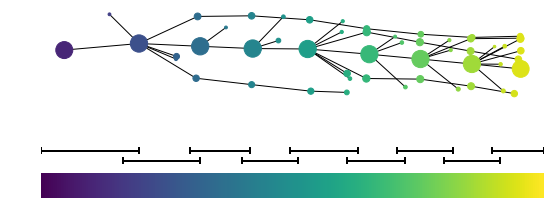

In [59]:
# Plot mapper

# Generate plot
fig, ax = plt.subplots(2, 1,figsize=(9,4))

# Plot mapper
(vmin, vmax, intervals) = plot_mapper(ax[0], 
                                      plot_layout=plot_layout, 
                                      out_location=trial_out, 
                                      cmap=cmap,
                                      #spring_k=None,
                                      big_component=True,
                                      adjust_node_size=True)

# Change aspect
#x0,x1=ax[0].get_xlim()
#y0,y1=ax[0].get_ylim()
#ax[0].set_aspect((x1-x0)/(y1-y0)/10)

# Plot colorbar
base = 1.5
h1 = 0
h2 = 0.4
plot_colorbar(ax[1], base + h1, base + h2, intervals, vmin, vmax, cmap,'horizontal')
#ax[1].set_aspect(1)#0.06)

# Show/save
#plt.savefig("./out/mapper.png",dpi=300, bbox_inches = 'tight',pad_inches = 0)
plt.show()



# Further 3D Visualization

In [50]:
# Plot cross-sections
import matplotlib.animation as animation
from IPython.display import HTML

# Create figure
fig = plt.figure()

# Loop through cross sections
ims = []
for q in range(0,V.shape[1],5):
    im = plt.imshow(V[:,q,:], cmap=cmap, animated=True,vmin=vmin,vmax=vmax,aspect='equal')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())

In [51]:
# Load file conversions
from npy_to_tiff import npy_to_tiff, voxel_to_tiff

In [54]:
# Convert arrays to tiff stacks for slicer viz

# Load label arrays
print("Loading label arrays...")
L0 = np.load(trial_out + "/labels0.npy")
L1 = np.load(trial_out + "/labels1.npy")

# Filter data using label arrays
print("Filtering data...")
v0 = np.copy(V)
v1 = np.copy(V)
O = np.copy(V)
cond0,cond1 = np.where(L0 == 0), np.where(L1 == 0)
v0[cond0] = 0
v1[cond1] = 0
O[cond0] = 0
O[cond1] = 0

# Save tif slices for viz
print("Saving tiff stacks...")
c_range = (0, L0.shape[-1]) # Min/max scaling values
voxel_to_tiff(v0, trial_out + "/label0/", c=c_range)
voxel_to_tiff(v1, trial_out + "/label1/", c=c_range)
voxel_to_tiff(O, trial_out + "/overlap/", c=c_range)
npy_to_tiff(out_file_z, trial_out + "/all/", c=c_range)

Loading label arrays...
Filtering data...
Saving tiff stacks...
